# Analise Comparativa



# Metodologia

## Pre-processamento

### Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from plotnine import *
import warnings

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import plotly.express as px

In [ ]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [ ]:
warnings.filterwarnings('ignore')

## Dados

In [ ]:
df = pd.read_excel('data/raw/default of credit card clients.xls')

In [ ]:
nomes = df.iloc[0]
nomes = dict(nomes)
nomes

{'Unnamed: 0': 'ID',
 'X1': 'LIMIT_BAL',
 'X2': 'SEX',
 'X3': 'EDUCATION',
 'X4': 'MARRIAGE',
 'X5': 'AGE',
 'X6': 'PAY_0',
 'X7': 'PAY_2',
 'X8': 'PAY_3',
 'X9': 'PAY_4',
 'X10': 'PAY_5',
 'X11': 'PAY_6',
 'X12': 'BILL_AMT1',
 'X13': 'BILL_AMT2',
 'X14': 'BILL_AMT3',
 'X15': 'BILL_AMT4',
 'X16': 'BILL_AMT5',
 'X17': 'BILL_AMT6',
 'X18': 'PAY_AMT1',
 'X19': 'PAY_AMT2',
 'X20': 'PAY_AMT3',
 'X21': 'PAY_AMT4',
 'X22': 'PAY_AMT5',
 'X23': 'PAY_AMT6',
 'Y': 'default payment next month'}

In [ ]:
df.rename(columns=nomes, inplace= True)

In [ ]:
df = df.drop(0)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df =df.astype(int)

In [ ]:

df['EDUCATION']= df['EDUCATION'].replace([1,2,3,[4,5,6,0]],[1,2,3,4])
df['MARRIAGE']= df['MARRIAGE'].replace([1,2,[3,0]],[1,2,3])

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:

X = df.drop(['default payment next month'], axis=1)
y = df['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)


In [ ]:

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X_train)
X_train = imputer.transform(X_train)


In [ ]:

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:


lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

print(X_train.shape, y_train.shape)

(20503, 24) (20503,)


# Classificação

### KNN

O knn tenta rotular uma amostra com base em suas amostras vizinhas, presentes no conjunto de treinamento.

In [ ]:
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 10)}

knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [ ]:
knn_gscv.best_params_

{'n_neighbors': 8}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Acuracia : {accuracy:.2f}')

Acuracia : 0.81


In [ ]:
conf_matriz = confusion_matrix(y_test,y_pred_knn)
conf_matriz

array([[5592,  281],
       [1174,  453]])

In [ ]:
fig = px.imshow(conf_matriz,
                labels=dict(x="Valores preditos", y="Valores reais", color="Productivity"),
                title='Matriz de Confusão KNN',
                text_auto=True, aspect="auto"
               )

fig.show()

In [ ]:
print(metrics.classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      5873
           1       0.62      0.28      0.38      1627

    accuracy                           0.81      7500
   macro avg       0.72      0.62      0.63      7500
weighted avg       0.78      0.81      0.78      7500



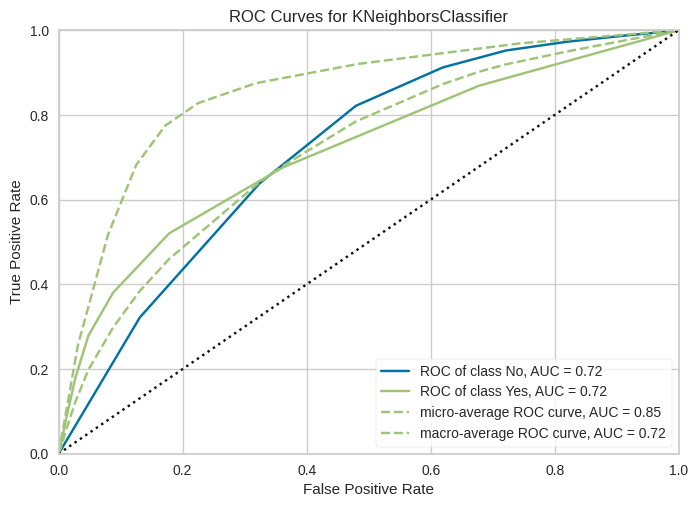

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['No', 'Yes'], estimator=KNeighborsClassifier(n_neighbors=8))

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(knn, X_train, y_train, X_test=X_test, y_test=y_test, classes=['No', 'Yes'])

In [ ]:
cv_scores_knn5 = cross_val_score(knn, X_train, y_train, cv=5)
print(cv_scores_knn5)
media = np.mean(cv_scores_knn5)
print(f'Media das validaçoes: {media: .2f}')

[0.80346257 0.80516947 0.79956108 0.80317073 0.79682927]
Media das validaçoes:  0.80


In [ ]:
cv_scores_knn10 = cross_val_score(knn, X_train, y_train, cv=10)
print(cv_scores_knn10)
media = np.mean(cv_scores_knn10)
print(f'Media das validaçoes: {media: .2f}')

[0.79814725 0.80594832 0.80204778 0.80341463 0.79902439 0.80097561
 0.80341463 0.80195122 0.79707317 0.79658537]
Media das validaçoes:  0.80


### SVM

O algoritmo de Support Vector MachineNesse plotamos cada item de dados como um ponto no espaço n-dimensional, com o valor de cada recurso sendo o valor de uma determinada coordenada. Então, nós executamos a classificação encontrando o hiperplano que melhor diferencia as duas classes.

In [ ]:
svm = SVC(gamma='auto').fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Acuracia : {accuracy:.2f}')

Acuracia : 0.82


In [ ]:

conf_matriz = confusion_matrix(y_test,y_pred_svm)

In [ ]:
conf_matriz

array([[5599,  274],
       [1096,  531]])

In [ ]:


fig = px.imshow(conf_matriz,
                labels=dict(x="Valores preditos", y="Valores reais", color="Productivity"),
                title='Matriz de Confusão SVM',
                x=['No', 'Yes'],y=['No', 'Yes'],
                text_auto=True, aspect="auto"
               )

fig.show()

In [ ]:
print(metrics.classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.66      0.33      0.44      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.64      0.66      7500
weighted avg       0.80      0.82      0.79      7500



In [ ]:
cv_scores_svm5 = cross_val_score(svm, X_train, y_train, cv=5)
print(cv_scores_svm5)
media = np.mean(cv_scores_svm5)
print(f'Media das validaçoes: {media: .2f}')

[0.81882468 0.82101926 0.81736162 0.81512195 0.81682927]
Media das validaçoes:  0.82


In [ ]:
cv_scores_svm10 = cross_val_score(svm, X_train, y_train, cv=10)
print(cv_scores_svm10)
media = np.mean(cv_scores_svm10)
print(f'Media das validaçoes: {media: .2f}')

[0.81911263 0.81569966 0.82593857 0.8195122  0.81219512 0.82195122
 0.81560976 0.81609756 0.82       0.81219512]
Media das validaçoes:  0.82


## Regressão Logistica

In [ ]:
logmodel = LogisticRegression().fit(X_train, y_train)
y_pred_log = logmodel.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_log)
print(f'Acuracia : {accuracy:.2f}')

Acuracia : 0.81


In [ ]:

conf_matriz = confusion_matrix(y_test,y_pred_log)

In [ ]:
conf_matriz

array([[5675,  198],
       [1230,  397]])

In [ ]:


fig = px.imshow(conf_matriz,
                labels=dict(x="Valores preditos", y="Valores reais", color="Productivity"),
                title='Matriz de Confusão Regressão Logística',
                x=['No', 'Yes'],y=['No', 'Yes'],
                text_auto=True, aspect="auto"
               )

fig.show()

In [ ]:
print(metrics.classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5873
           1       0.67      0.24      0.36      1627

    accuracy                           0.81      7500
   macro avg       0.74      0.61      0.62      7500
weighted avg       0.79      0.81      0.77      7500



In [ ]:
cv_scores_log5 = cross_val_score(logmodel, X_train, y_train, cv=5)
print(cv_scores_log5)
media = np.mean(cv_scores_log5)
print(f'Media das validaçoes: {media: .2f}')

[0.80785174 0.8110217  0.80955864 0.8104878  0.80780488]
Media das validaçoes:  0.81


In [ ]:
cv_scores_log10 = cross_val_score(logmodel, X_train, y_train, cv=10)
print(cv_scores_log10)
media = np.mean(cv_scores_log10)
print(f'Media das validaçoes: {media: .2f}')

[0.80643588 0.80887372 0.81764993 0.80780488 0.80926829 0.81268293
 0.81073171 0.81268293 0.8102439  0.80780488]
Media das validaçoes:  0.81


## Decision Tree

In [ ]:
dtmodel = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dt = dtmodel.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Acuracia : {accuracy:.2f}')

Acuracia : 0.72


In [ ]:

conf_matriz = confusion_matrix(y_test,y_pred_dt)

In [ ]:
conf_matriz

array([[4749, 1124],
       [ 944,  683]])

In [ ]:


fig = px.imshow(conf_matriz,
                labels=dict(x="Valores preditos", y="Valores reais", color="Productivity"),
                title='Matriz de Confusão Decision Tree',
                x=['No', 'Yes'],y=['No', 'Yes'],
                text_auto=True, aspect="auto"
               )

fig.show()

In [ ]:
print(metrics.classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      5873
           1       0.38      0.42      0.40      1627

    accuracy                           0.72      7500
   macro avg       0.61      0.61      0.61      7500
weighted avg       0.74      0.72      0.73      7500



In [ ]:
cv_scores_dt5 = cross_val_score(dtmodel, X_train, y_train, cv=5)
print(cv_scores_dt5)
media = np.mean(cv_scores_dt5)
print(f'Media das validaçoes: {media: .2f}')

[0.71714216 0.72713972 0.73299195 0.71219512 0.71585366]
Media das validaçoes:  0.72


In [ ]:
cv_scores_dt10 = cross_val_score(dtmodel, X_train, y_train, cv=10)
print(cv_scores_dt10)
media = np.mean(cv_scores_dt10)
print(f'Media das validaçoes: {media: .2f}')

[0.72013652 0.72306192 0.72793759 0.74       0.7195122  0.72243902
 0.72       0.70878049 0.7204878  0.70780488]
Media das validaçoes:  0.72


## Random Forest

In [ ]:
rfmodel = RandomForestClassifier().fit(X_train, y_train)
y_pred_rf = rfmodel.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Acuracia : {accuracy:.2f}')

Acuracia : 0.82


In [ ]:
conf_matriz = confusion_matrix(y_test,y_pred_rf)

In [ ]:
conf_matriz

array([[5535,  338],
       [1037,  590]])

In [ ]:


fig = px.imshow(conf_matriz,
                labels=dict(x="Valores preditos", y="Valores reais", color="Productivity"),
                title='Matriz de Confusão Decision Tree',
                x=['No', 'Yes'],y=['No', 'Yes'],
                text_auto=True, aspect="auto"
               )

fig.show()

In [ ]:
print(metrics.classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5873
           1       0.64      0.36      0.46      1627

    accuracy                           0.82      7500
   macro avg       0.74      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500



In [ ]:
cv_scores_rf5 = cross_val_score(rfmodel, X_train, y_train, cv=5)
print(cv_scores_rf5)
media = np.mean(cv_scores_rf5)
print(f'Media das validaçoes: {media: .2f}')

[0.81565472 0.82272616 0.81663009 0.81195122 0.8097561 ]
Media das validaçoes:  0.82


In [ ]:
cv_scores_rf10 = cross_val_score(rfmodel, X_train, y_train, cv=10)
print(cv_scores_rf10)
media = np.mean(cv_scores_rf10)
print(f'Media das validaçoes: {media: .2f}')

[0.81862506 0.81374939 0.81813749 0.82097561 0.81609756 0.82146341
 0.80634146 0.81463415 0.80780488 0.8097561 ]
Media das validaçoes:  0.81


### Cross-Validetion

In [ ]:
modelo = ['KNN','SVM','Reg Logistica','Decision Tree','Random Forest']
val_5= [cv_scores_knn5,cv_scores_svm5,cv_scores_log5,cv_scores_dt5,cv_scores_rf5]

In [ ]:
dic_validade_5 = dict(zip(modelo, val_5))

In [ ]:
dados_val_5=pd.DataFrame(dic_validade_5)

In [ ]:
modelo = ['KNN','SVM','Reg Logistica','Decision Tree','Random Forest']
val_10= [cv_scores_knn10,cv_scores_svm10,cv_scores_log10,cv_scores_dt10,cv_scores_rf10]

In [ ]:
dic_validade_10 = dict(zip(modelo, val_10))
dados_val_10=pd.DataFrame(dic_validade_10)

# Resultados

Avaliando os resulatos das Validação Cruzada para 5 e 10 k-folds, a melhor média de resultado foi para o SVM, o KNN obteve resultados piores que o SVM, o Random Florest e a Regressão Logística, superando apenas a Arvore de Decisão.




In [ ]:
dados_val_5

,KNN,SVM,Reg Logistica,Decision Tree,Random Forest
0,0.803463,0.818825,0.807852,0.717142,0.815655
1,0.805169,0.821019,0.811022,0.727140,0.822726
2,0.799561,0.817362,0.809559,0.732992,0.816630
3,0.803171,0.815122,0.810488,0.712195,0.811951
4,0.796829,0.816829,0.807805,0.715854,0.809756


In [ ]:
fig = px.line(dados_val_5,
              markers=True,
              title='Validação Cruzada com k=5')
fig.show()

In [ ]:
dados_val_5.mean()


KNN              0.801639
SVM              0.817831
Reg Logistica    0.809345
Decision Tree    0.721065
Random Forest    0.815344
dtype: float64

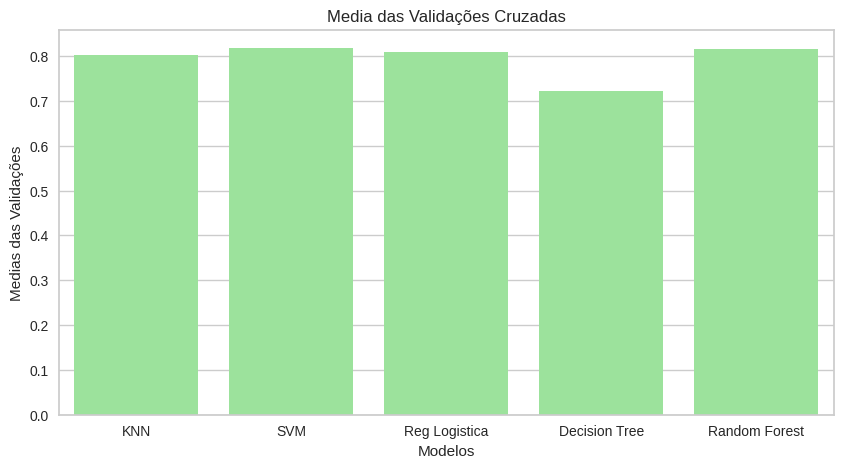

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data = dados_val_5,estimator='mean',errorbar=None,color='lightgreen')


plt.title('Media das Validações Cruzadas' )
plt.xlabel('Modelos')
plt.ylabel('Medias das Validações')
plt.legend()

In [ ]:

dados_val_10

,KNN,SVM,Reg Logistica,Decision Tree,Random Forest
0,0.798147,0.819113,0.806436,0.720137,0.818625
1,0.805948,0.815700,0.808874,0.723062,0.813749
2,0.802048,0.825939,0.817650,0.727938,0.818137
3,0.803415,0.819512,0.807805,0.740000,0.820976
4,0.799024,0.812195,0.809268,0.719512,0.816098
5,0.800976,0.821951,0.812683,0.722439,0.821463
6,0.803415,0.815610,0.810732,0.720000,0.806341
7,0.801951,0.816098,0.812683,0.708780,0.814634
8,0.797073,0.820000,0.810244,0.720488,0.807805
9,0.796585,0.812195,0.807805,0.707805,0.809756


In [ ]:
fig = px.line(dados_val_10,
              markers=True,
              title='Validação Cruzada com k=10')
fig.show()

In [ ]:
dados_val_10.mean()

KNN              0.800858
SVM              0.817831
Reg Logistica    0.810418
Decision Tree    0.721016
Random Forest    0.814759
dtype: float64

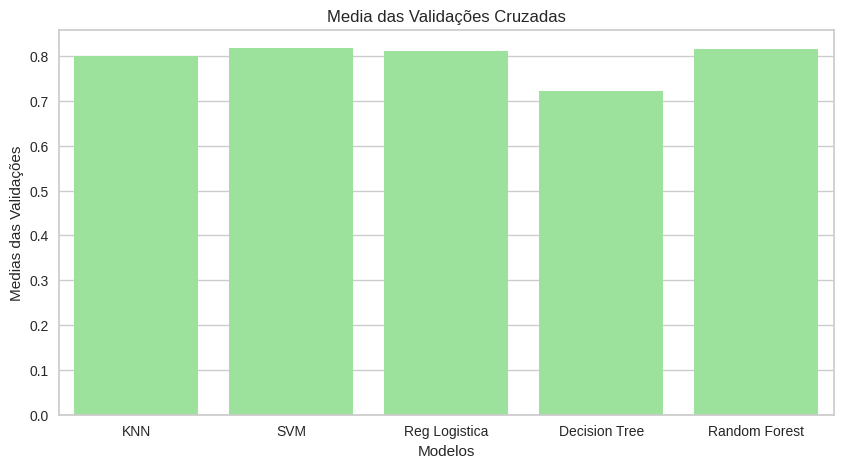

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data = dados_val_10,estimator='mean',errorbar=None,color='lightgreen')


plt.title('Media das Validações Cruzadas' )
plt.xlabel('Modelos')
plt.ylabel('Medias das Validações')
plt.legend()